# Mass of Toxins in the Great Lakes

Yeyang (David) Ou,
Yirui Wang ,
Mateo Domínguez De La Llera.


## Descriptions of our Model
For this Assignment, we constructed a 6 tank-system that models the change in mass of toxins in each of the Five Great Lakes and Lake St.Claire. The main focus of this model would be the on the Five Great Lakes, so we ignore any effects on Lake St.Claire.

In [1]:
import numpy as np; import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement

Create a 6-tank system that models the change in the mass of toxins in each of the five Great Lakes as a function of time.

## Variables and Parameters

The following are our paremeters.

| Description | Symbol | Dimension | Type |
| :---: | :----: | :---: | :---: |
| Time | $t$ | T | independent variable |
| Mass of toxins in Lake Superior, Huron, Michigan, St.Claire, Erie, Ontario respectively | $M_{1}$, $M_{2}$, $M_{3}$, $M_{4}$, $M_{5}$, $M_{6}$| M | dependent variable |
| Volume of Lake Superior, Huron, Michigan, St.Claire, Erie, Ontario respectively| $V_{1}$, $V_{2}$, $V_{3}$, $V_{4}$, $V_{5}$, $V_{6}$ | M<sup>3</sup> | Parameter |
| Flow rate from Lake Superior to Lake Huron | $Q_{1}$ | M<sup>3</sup> T<sup>-1</sup> |  Parameter |
| Flow rate between Lake Michigan and Lake Huron | $Q_{2}$ | M<sup>3</sup> T<sup>-1</sup> | Parameter |
| Flow rate from Lake Huron to Lake St.Claire | $Q_{3}$ | M<sup>3</sup> T<sup>-1</sup> |  Parameter |
| Flow rate from Lake St.Claire to Lake Erie| $Q_{4}$ | M<sup>3</sup> T<sup>-1</sup> |  Parameter |
| Flow rate from Lake Erie to Lake Ontario | $Q_{5}$ | M<sup>3</sup> T<sup>-1</sup> |  Parameter |
| Flow rate from Lake Ontario to Atlantic Ocean | $Q_{6}$ | M<sup>3</sup> T<sup>-1</sup> |  Parameter |
| External inflow of Toxin to Lake Superior, to Lake Huron, to Lake Michigan, to Lake Erie, to Lake Ontario respectively | $T_{1}$, $T_{2}$, $T_{3}$, $T_{5}$, $T_{6}$ | M<sup></sup> T<sup>-1</sup> |  Parameter |
| Initial Mass of Toxin in Lake Superior, Huron, Michigan, St.Claire, Erie, Ontario respectively | $M_{1,0}$, $M_{2,0}$, $M_{3,0}$, $M_{4,0}$, $M_{5,0}$, $M_{6,0}$| M | Parameter|

### Diagram of the System

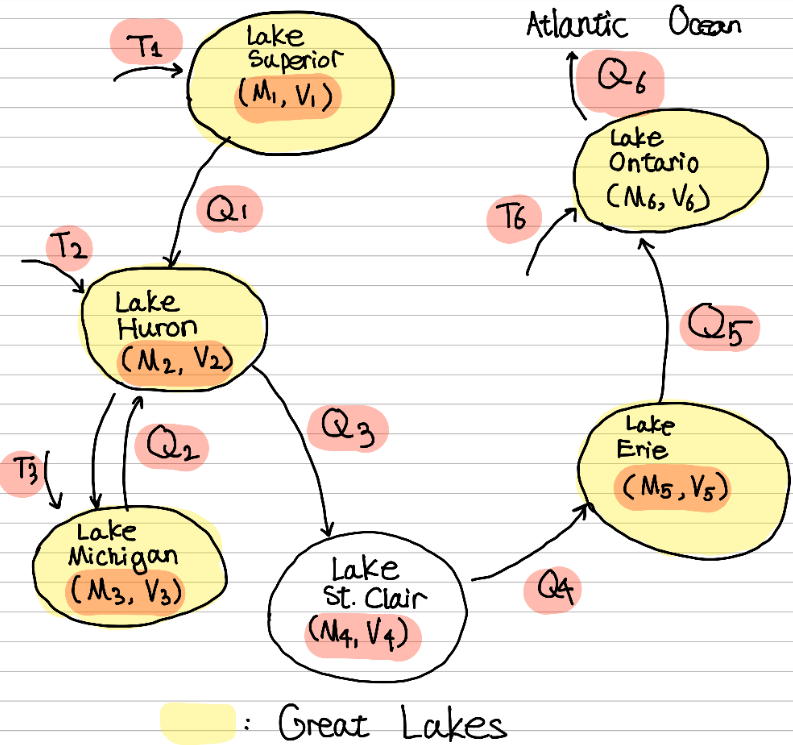

## Assumptions and Constraints

The following are the assumptions and constraints we make:
* The flow rates between lakes are constant.
* Each Great Lake has an additional and constant inflow of toxins from the nearby cities, snowfall, and rainfall.
* Lake St.Claire is not polluted with any toxins other than those coming from other lakes.
* All types of toxins (by chemical composition or source) have equal density.
* Wastewater is treated as being entirely made of toxins.
* The amount of wastewater dumped into lakes is proportional to the volume of the lake.
* Toxins and water mix uniformly in each lake.
* The lakes can always dilute more toxins.
* No toxins deposit as sediment, they go with the river flow.
* Lakes can only reduce their level of toxins through the outflow of water to other water bodies.
* Water inflows from snowfall and rainfall balance the outflow of water in each lake, there is no water evaporation, seasonal variation, nor is it extracted for human or industrial consumption, so the volume of lakes are constant.
* Aside from the Straits of  Mackinac, no water nor toxins flow up the rivers, everything goes down the system to the Atlantic ocean.
* The initial volume of toxins is 0.5% of each Great Lakes.

## Building Solutions

Since the water from Lake Huron to Eerie will flow through lake St. Claire, we  include the change in mass of toxins in Lake St. Claire to make our model more realisitic.

The mass flow rate going into or leaving a lake $i$ is $± Q_i \cdot M_i / V_i$. We apply the mass balance equation to all the lakes:

\begin{align*}
\frac{dM_1}{dt} &= T_1 - \frac{Q_1 M_1}{V_1}, \\
\frac{dM_2}{dt} &= T_2 + \frac{Q_1 M_1}{V_1} + \frac{Q_2 M_3}{V_3} - \frac{Q_2 M_2}{V_2} - \frac{Q_3 M_2}{V_2} , \\
\frac{dM_3}{dt} &= T_3 + \frac{Q_2 M_2}{V_2} - \frac{Q_2 M_3}{V_3} ,\\
\frac{dM_4}{dt} &= \frac{Q_3 M_2}{V_2} - \frac{Q_4 M_4}{V_4} ,\\
\frac{dM_5}{dt} &= T_5 + \frac{Q_4 M_4}{V_4} - \frac{Q_5 M_5}{V_5} ,\\
\frac{dM_6}{dt} &= T_6 + \frac{Q_5 M_5}{V_5} - \frac{Q_6 M_6}{V_6}
\end{align*}

Apply nondimensionalization procedure. Since the scale of the mass of toxins of every lake is the same, we let $M_i = [M]M_i^*$, $t = [t] t^*$. Make the substitutions:
\begin{align*}
\frac{[M]dM_1^*}{[t]dt^*} &= T_1 - \frac{Q_1 [M]M_1^*}{V_1}, \\
\frac{[M]dM_2^*}{[t]dt^*} &= T_2 + \frac{Q_1 [M]M_1^*}{V_1} + \frac{Q_2 [M]M_3^*}{V_3} - \frac{Q_2 [M]M_2^*}{V_2} - \frac{Q_3 [M]M_2^*}{V_2} , \\
\frac{[M]dM_3^*}{[t]dt^*} &= T_3 + \frac{Q_2 [M]M_2^*}{V_2} - \frac{Q_2 [M]M_3^*}{V_3} ,\\
\frac{[M]dM_4^*}{[t]dt^*} &= \frac{Q_3 [M]M_2^*}{V_2} - \frac{Q_4 [M]M_4^*}{V_4} ,\\
\frac{[M]dM_5^*}{[t]dt^*} &= T_5 + \frac{Q_4 [M]M_4^*}{V_4} - \frac{Q_5 [M]M_5^*}{V_5} ,\\
\frac{[M]dM_6^*}{[t]dt^*} &= T_6 + \frac{Q_5 [M]M_5^*}{V_5} - \frac{Q_6 [M]M_6^*}{V_6} ,\\
M_i(0)^* &= \frac{M_{i,0}}{[M_i]} .\\
\end{align*}


Divide the system by the coefficient of highest-order term. We then chose our $[t] = \frac{V_3}{Q_2}, [M] = \frac{T_1 * V_3}{Q_2}$ for simplification. The resulting system after non-dimensionalization is as follows:

\begin{align*}
\frac{dM_1^*}{dt^*} &= 1 - \frac{Q_1 V_3 M_1^*}{Q_2 V_1}, \\
\frac{dM_2^*}{dt^*} &= \frac{T_2}{T_1} + \frac{Q_1 V_3 M_1^*}{Q_2 V_1} + M_3^* - \frac{V_3 M_2^*}{V_2} - \frac{Q_3 V_3 M_2^*}{Q_2 V_2}, \\
\frac{dM_3^*}{dt^*} &= \frac{T_3}{T_1} + \frac{V_3 M_2^*}{V_2} - M_3^*,\\
\frac{dM_4^*}{dt^*} &= \frac{Q_3 V_3 M_2^*}{Q_2 V_2} - \frac{Q_4 V_3 M_4^*}{Q_2 V_4} ,\\
\frac{dM_5^*}{dt^*} &= \frac{T_5}{T_1} + \frac{Q_4 V_3 M_4^*}{Q_2 V_4} - \frac{Q_5 V_3 M_5^*}{Q_2 V_5} ,\\
\frac{dM_6^*}{dt^*} &= \frac{T_6}{T_1} + \frac{Q_5 V_3 M_5^*}{Q_2 V_5} - \frac{Q_6 V_3 M_6^*}{Q_2 V_6} ,\\
M_i(0)^* &= \frac{M_{i,0} Q_2}{T_1 V_3} .\\
\end{align*}

### Analyze and Assess

We consider the following values for our parameters. The values for the **inflow of toxins** are taken from the International Joint Comission (2017). The only given data are billions of gallons of untreated sewages and stormwater poured into rivers and the Great Lakes per year. We treat such waters as entirely made of toxins, with a density of 1 kilogram per liter. Then we recall the assumption that the amount of wastewater dumped into lakes is proportional to the volume of the lake.

The **initial mass values for the toxins** are taken from Allan, R. J., & Ball, A. J. (1991). We observed the mean value of contaminant concentrations from tables 4, 6, 8, and 15, which begin on page 117, covering data for the five lakes. We made the assumption that the initial volume of toxins is 0.5% of the total volume of each Great Lake. Therefore, we multiply the concentration by this percentage and then by the volume of each lake to obtain the initial toxin mass.

In [29]:
## Volume of lakes, in cubic meters (taken from [1])
V1 = 12004e9; V2 = 3550e9; V3 = 4860e9; V4 = 4e9; V5 = 499e9; V6 = 1656e9

## Flow rate of rivers, in cubic meters per second (taken from [3])
Q1 = 2150; Q2 = 5180; Q3 = 2150; Q4 = 2150; Q5 = 5860; Q6 = 6880

## External inflow of toxins, in kilograms per second (taken from [2])
T = 11043.179857940131   # 92e9 * 3.78541 / (525600 * 60)

T1 = 12004e9/22573e9 * T; T2 = 3550e9/22573e9 * T; T3 = 4860e9/22573e9 * T
T4 = 4e9/22573e9 * T; T5 = 499e9/22573e9 * T; T6 = 1656e9/22573e9 * T

## Initial mass of in each of the 6 Lakes, in kg (taken from [4])
M01 = 3.66786272e16; M02 = 1.81942194e16; M03 = 2.52868812e16
M04 = 0; M05 = 1.42475274e15; M06 = 3.35227152e15

## Initial toxin levels after applying non-dimensionalization.
Mt1 = M01*Q2/(T1*V3); Mt2 = M02*Q2/(T1*V3); Mt3 = M03*Q2/(T1*V3);
Mt4 = M04*Q2/(T1*V3); Mt5 = M05*Q2/(T1*V3); Mt6 = M06*Q2/(T1*V3)

Plot some solutions:

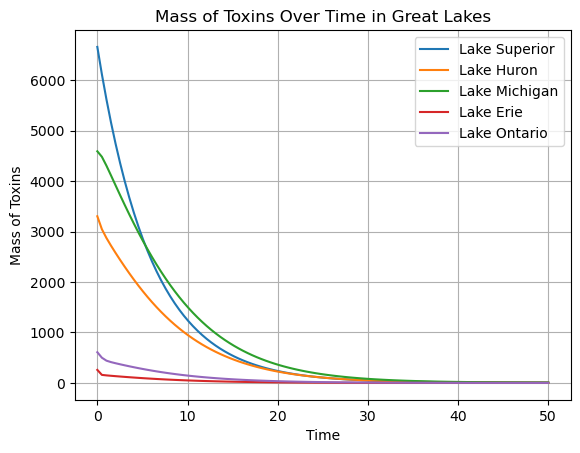

In [30]:
### Non-dimensionalized System of ODE
def Non_dim_laketoxin(M,t):
  M1,M2,M3,M4,M5,M6 = M
  dM1dt = 1 - Q1*V3*M1/(Q2*V1)
  dM2dt = T2/T1 + Q1*V3*M1/(Q2*V1)+M3-V3*M2/V2-Q3*V3*M2/(Q2*V2)
  dM3dt = M2*V3/V2 - M3 + T3/T1
  dM4dt = Q3*V3*M2/(Q2*V2) - Q4*M4*V3/(V4*Q2)
  dM5dt = Q4*V3* M4/(Q2*V4) - M5*Q5*V3/(V5*Q2) + T5/T1
  dM6dt = M5*V3*Q5/(Q2*V5) - M6*Q6*V3/(V6*Q2) + T6/T1
  return [dM1dt, dM2dt, dM3dt, dM4dt, dM5dt, dM6dt]

# Initial Mass of Toxin in the 6 lakes with Toxin
M0 = [Mt1,Mt2,Mt3,Mt4,Mt5,Mt6]

# Time Vector
t = np.linspace(0,50,100)

# DE solution
M1 = spi.odeint(Non_dim_laketoxin,M0,t)

# Plot
plt.plot(t, M1[:,0], label="Lake Superior");plt.plot(t, M1[:,1], label="Lake Huron")
plt.plot(t, M1[:,2], label="Lake Michigan"); plt.plot(t, M1[:,4], label="Lake Erie")
plt.plot(t, M1[:,5], label="Lake Ontario"); plt.grid(); plt.legend()
plt.xlabel('Time'); plt.ylabel('Mass of Toxins')
plt.title('Mass of Toxins Over Time in Great Lakes'); plt.show()

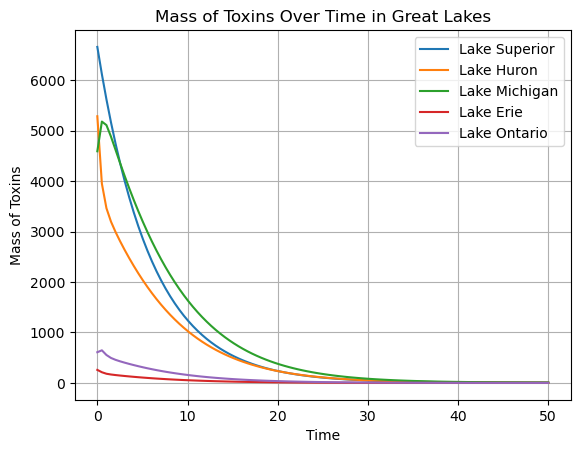

In [20]:
# Alternative Initial Condition
M0 = [Mt1,1.6*Mt2,Mt3,Mt4,Mt5,Mt6]

# DE solution
M1 = spi.odeint(Non_dim_laketoxin,M0,t)

# Plot
plt.plot(t, M1[:,0], label="Lake Superior");plt.plot(t, M1[:,1], label="Lake Huron")
plt.plot(t, M1[:,2], label="Lake Michigan"); plt.plot(t, M1[:,4], label="Lake Erie")
plt.plot(t, M1[:,5], label="Lake Ontario"); plt.grid(); plt.legend()
plt.xlabel('Time'); plt.ylabel('Mass of Toxins')
plt.title('Mass of Toxins Over Time in Great Lakes'); plt.show()

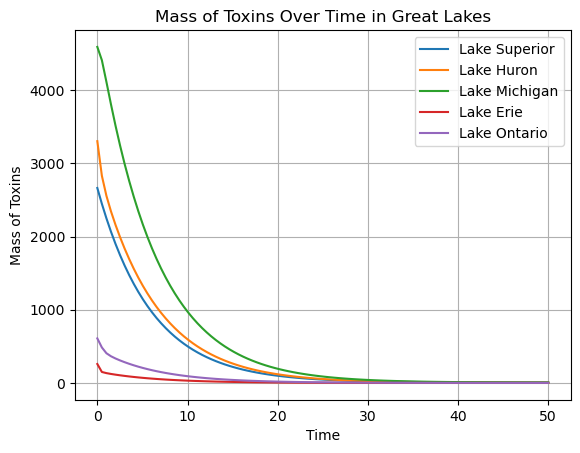

In [22]:
# Alternative Initial Condition
M0 = [0.4*Mt1,Mt2,Mt3,Mt4,Mt5,Mt6]

# DE solution
M1 = spi.odeint(Non_dim_laketoxin,M0,t)

# Plot
plt.plot(t, M1[:,0], label="Lake Superior");plt.plot(t, M1[:,1], label="Lake Huron")
plt.plot(t, M1[:,2], label="Lake Michigan"); plt.plot(t, M1[:,4], label="Lake Erie")
plt.plot(t, M1[:,5], label="Lake Ontario"); plt.grid(); plt.legend()
plt.xlabel('Time'); plt.ylabel('Mass of Toxins')
plt.title('Mass of Toxins Over Time in Great Lakes'); plt.show()

The time scale $[t] = \frac{V_3}{Q_2}$ represents the time it takes the Straits of Mackinac to drain all of Lake Huron (or its volume equivalent), while $[M] = [t] \cdot T_1 = \frac{V_3}{Q_2} \cdot T_1$ is the total mass of toxins going into Lake superior during the above-mentioned period.

We consider 3 scenarios, the first with an initial condition (IC) given by the data, an alternative IC with higher initial mass of toxins for Lake Huron and the last IC with lower initial mass of toxins for Lake Superior. The overall behavior is similar: the mass of toxins decreases for all the lakes and converges to $0$ after 35 periods. This behavior shows that the rate of toxins flowing into the system is lower than the rate toxins flowing out of the system, and so they eventually flow out of the lakes into the Atlantic Ocean. The only exception is that, for the model with the second IC, Lake Michigan first has an increase in the mass of toxins due to the large inflow of toxins from Lake Huron, but quickly reverses the behavior and reduces its toxins.

## References

[1]    United States Environmental Protection Agency.  (2023). *Physical Features of the Great Lakes*. https://www.epa.gov/greatlakes/physical-features-great-lakes

[2] International Joint Comission. (2017). *First Triennial Assessment of Progress on Great Lakes Water Quality*. https://legacyfiles.ijc.org/tinymce/uploaded/GLWQA/TAP.pdf

[3] Lee, P. & Lloyd, J. (1993). *Great Lakes Water Levels*. Environment and Natural Resources Canada. https://ijc.org/sites/default/files/Great%20Lakes%20Water%20Levels%20Brochure_1993_e.pdf

[4] Allan, R. J., & Ball, A. J. (1991, March). *Toxic Chemicals in the Great Lakes and Associated Effects*. Environment Canada. https://legacyfiles.ijc.org/publications/ID1014.pdf